# Definiowanie zmiennej losowej ciągłej

### Statystyczna analiza danych
**dr inż. Wojciech Artichowicz**

**Katedra Geotechniki i Inżynierii Wodnej PG**

### Tworzenie rozkładu ciągłego

Podstawowym obiektem, na bazie którego tworzy się rozkłady pochodne jest [klasa rv_continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous). Wykorzystując mechanizm dziedziczenia możliwe jest definiowanie własnych rozkładów. Tworząc nowy rozkład należy zapewnić spełnienie założeń teorii prawdopodobieństwa np.: $lim_{x \to \infty}F(x)=1$

**Uwaga** Jeśli nie zostaną przeciążone metody prywatne `_logpdf`, `_cdf`, `_logcdf`, `_ppf`, `_rvs`, `_isf`,`_sf`, `_logsf`, wówczas będą one obliczane numerycznie na podstawie metody `_pdf` albo `_cdf`. Przynajmniej jedna metoda prywatna `_pdf` albo `_cdf` zawsze musi zostać zdefiniowana przez użytkownika.

### Import bibliotek języka Python

In [1]:
from scipy import stats as st # import podstawowej biblioteki z obiektami rozkładów prawdopodobieństwa
import numpy as np # wymagane do manipulacji tablicami numpy
import matplotlib.pyplot as plt #biblioteki wymagane do wykresu
%matplotlib inline

### Tworzenie klasy reprezentującej ciągły rozkład prawdopodobieństwa z parametrami

Utworzyć  klasę reprezentująca [rozkład Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) z parametrami: położenia $x_0$ oraz skali $\gamma$.

$$f(x)=\frac{1}{\pi \gamma \left[ 1 + \left(\frac{x-x_0}{\gamma}\right)^2 \right]}$$

$$F(x) = \frac{1}{\pi} \arctan \left(\frac{x-x_0}{\gamma}\right) + \frac{1}{2}$$

**Uwaga:** Jest to przykład uproszczony nie dający pełnej funkcjonalności obiektów rozkładów ze `scipy.stats`.

In [2]:
class rozklad(st.rv_continuous): # dziedziczenie po klasie rv_continuous
    "kolejny własny rozkład o gęstości f(x)"
    
    def __init__(self,x0_a:float,gamma_a:float): 
        super().__init__()
        self.loc = x0_a            
        self.scale = gamma_a

    def _pdf(self, x:float)->float: # przeciążenie funkcji _pdf (gęstość prawdopodobieństwa)
        return 1./(np.pi*self.scale*(1.+((x-self.loc)/self.scale)**2.))
    
    def _cdf(self, x:float)->float: # przeciążenie funkcji _cdf (dystrybuanta) 
        return (1./np.pi)*np.arctan((x-self.loc)/self.scale)+0.5  

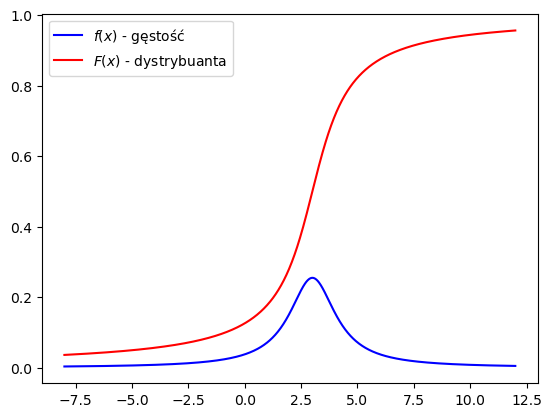

In [3]:
RV = rozklad(x0_a = 3, gamma_a = 1.25) # utworzenie instancji obiektu rozkładu

x = np.linspace(-8,12,1000) # wektor wartości x
f = RV.pdf(x) # wektor wartości gęstości rozkładu prawdopodobieństwa
F = RV.cdf(x) # obliczenie wartości dystrybuanty
plt.plot(x,f,"blue",x,F,"red")
plt.legend(["$f(x)$ - gęstość","$F(x)$ - dystrybuanta"])
pass